In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
# Load the dataset
file_path="C:\\Python_Retail_Store_Analysis\\Online Retail Sales Dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
## Data Loading and Cleaning
# Inspect the dataset ; check first few rows
print(df.head())

# Check the column data types
print(df.info())

# Summary statistics
print(df.describe())

   transaction_id      timestamp  customer_id  product_id  \
0               1  1/1/2023 0:00         1993         915   
1               2  1/1/2023 0:01         3474         553   
2               3  1/1/2023 0:02         4564         248   
3               4  1/1/2023 0:03         1133         948   
4               5  1/1/2023 0:04         3626         284   

         product_category  quantity   price  discount payment_method  \
0          Home & Kitchen         8  103.30      0.23      Gift Card   
1                Clothing         9  180.28      0.31      Gift Card   
2  Beauty & Personal Care         7   81.58      0.27     Debit Card   
3                Clothing         3  235.20      0.00     Debit Card   
4                   Books         9  453.00      0.34    Credit Card   

   customer_age customer_gender customer_location  total_amount  
0            27          Female     North America        636.33  
1            53           Other     South America       1119.54  
2 

In [4]:
# Check for missing values
print(df.isnull().sum())

transaction_id       0
timestamp            0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
dtype: int64


In [5]:
# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
## Feature Engineering
# Create Time-based features

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday
df['hour'] = df['timestamp'].dt.hour

In [7]:
# Remove duplicates if any
df = df.drop_duplicates()

In [8]:
# Validate Sales Calculation (Total Amount)

# Ensure 'total_amount' is correctly calculated as quantity * price * (1 - discount)
df['calculated_total'] = df['quantity'] * df['price'] * (1 - df['discount'])

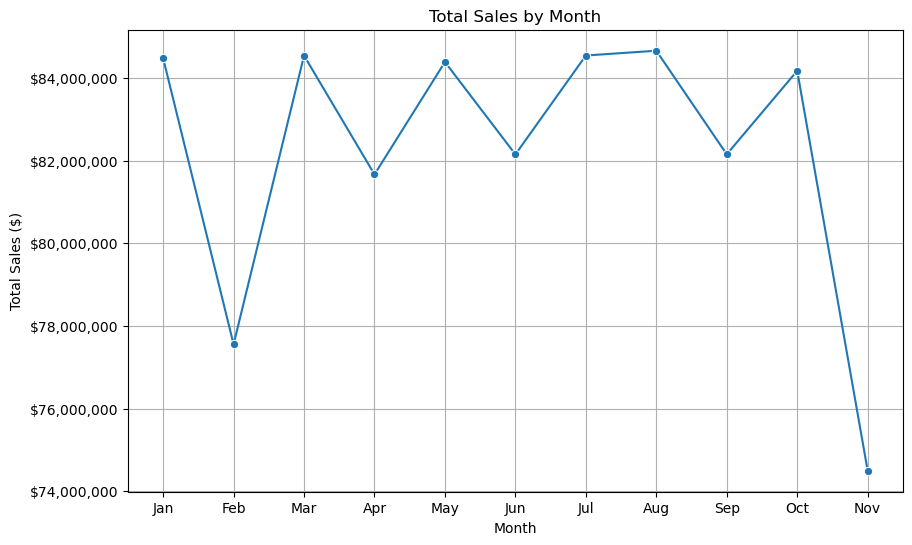

In [ ]:
## Exploratory Data Analysis (EDA)

#1. Monthly Sales Trend

import matplotlib.ticker as mtick  # Import ticker for formatting

# Aggregate sales over time
sales_trend = df.groupby('month')['total_amount'].sum()

# Filter to show only January (1) to November (11)
sales_trend = sales_trend.loc[1:11]

# Plot sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker='o')

# Formatting the plot
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')  # Adding dollar sign
plt.xticks(ticks=range(1, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov'])  # Custom month labels

# Format y-axis to show normal numbers with dollar sign
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.grid(True)
plt.show()

#1. Monthly Sales Trend - Insights 🔍

Overall Sales Stability 📊
The sales figures remain relatively stable across most months, fluctuating between $78M and $85M.
This suggests a consistent revenue stream with no extreme seasonal spikes (except for the decline in November).

Sales Drop in February 📉
February shows a noticeable dip in total sales, dropping below $78M.
This could be due to factors such as:
Shorter month (fewer days for transactions).
Post-holiday consumer spending slowdown.
Seasonal trends in the business cycle.

Strong Recovery in March & May 🏆
March and May show spikes in sales, suggesting possible promotional campaigns, product launches, or seasonal trends driving higher revenue.

July & August Peak Performance 🔥
The highest revenue months seem to be July and August, possibly indicating:
Increased summer shopping trends.
Back-to-school promotions driving higher sales.

November Decline 🚨
November sees a sharp decline in sales, significantly lower than the previous months.
This is unexpected, as November typically includes Black Friday and Cyber Monday, which should drive sales up, not down.
Possible reasons for this drop:
Data issue - missing transactions for later November days (26-30).
Shift in consumer spending habits (delayed purchases for December?).
Supply chain or stock availability issues affecting order fulfillment.

Further info required 🔍
    Compare with Previous Years (if available): Look at year-over-year trends to understand if this pattern is normal.

C:\Users\jayba\AppData\Local\Temp\ipykernel_8384\3237179002.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_r")
C:\Users\jayba\AppData\Local\Temp\ipykernel_8384\3237179002.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


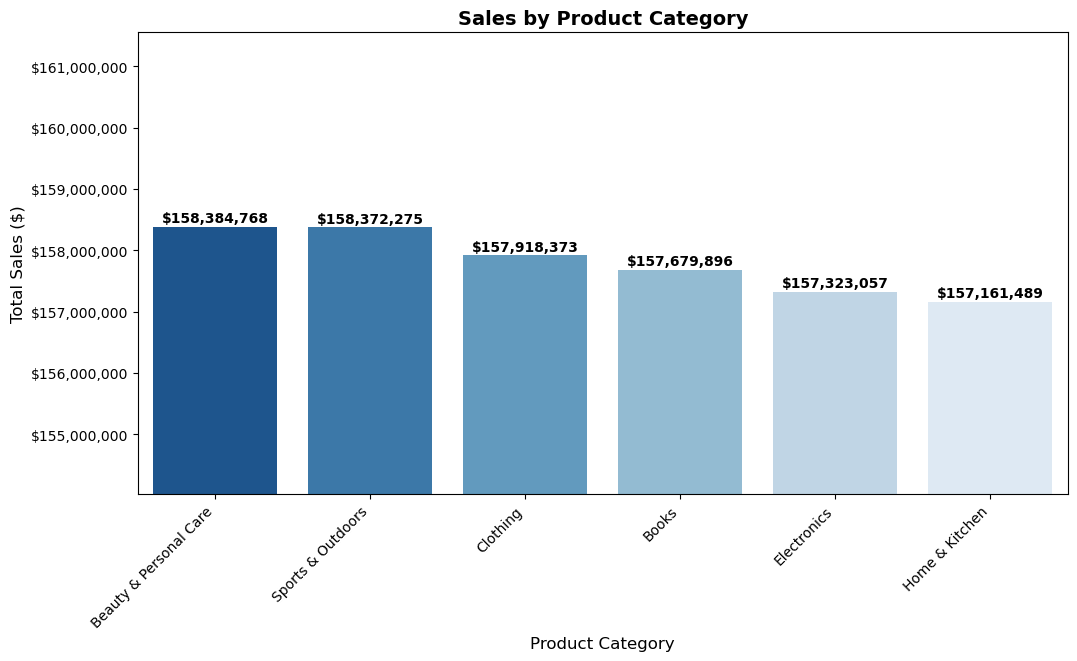

In [10]:
#2. Sales by Product Category
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

import matplotlib.ticker as mtick  # Import ticker for formatting

# Aggregate sales by product category
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

# Define y-axis limits to maximize space usage
y_min = category_sales.min() * 0.98  # Slightly below lowest sales value
y_max = category_sales.max() * 1.02  # Slightly above highest sales value

# Create figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_r")

# Add labels on top of each bar
for index, value in enumerate(category_sales.values):
    ax.text(index, value + (y_max - y_min) * 0.01, f'${value:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Formatting the plot
ax.set_title('Sales by Product Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Total Sales ($)', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set optimized y-axis limits
ax.set_ylim(y_min, y_max)

# Format y-axis to show actual dollar values with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.show()


##2. Sales by Product Category - Insights 🔍

🔝 Small Sales Variance Between Categories

    The sales values across product categories are very close to each other, ranging between $157M and $158.4M.
    The difference between the highest and lowest-selling category is only about $1.2M, indicating consistent sales performance across categories.

🏆 Top-Performing Category: Beauty & Personal Care

    Beauty & Personal Care leads with $158.38m in total sales.
    This suggests strong demand for personal care products, possibly driven by consumer loyalty, recurring purchases, or premium pricing.

📉 Lowest Sales Category: Home & Kitchen

    Home & Kitchen has the lowest sales at $157.16m, but the difference from other categories is minimal.
    This could indicate stable but slightly lower demand, potentially due to seasonality or fewer high-value purchases compared to other categories.

📊 Sales Distribution is Even

    The small gap between categories suggests a well-balanced product portfolio, where no single category significantly underperforms.
    This could mean diversified revenue streams, reducing the risk of reliance on one category.

🚀 Potential Areas for Growth

    Since all categories are performing similarly, opportunities for growth may lie in targeted marketing strategies, bundling products, or offering category-specific promotions.
    Home & Kitchen could benefit from seasonal campaigns or enhanced product offerings to boost sales.

🎯 Recommendations for Business Strategy

✔ Expand High-Performing Categories – Invest in marketing for Beauty & Personal Care to leverage its strong position.
✔ Analyze Consumer Behavior – Understand why the gap is small—is it pricing, promotions, or customer demand?
✔ Differentiate Categories – Since sales are evenly spread, innovation or unique selling propositions (USPs) can help certain categories stand out and grow.

In [6]:
#3.1 Impact of Discounts on Sales
import scipy.stats as stats

# Compute Pearson Correlation
correlation, p_value = stats.pearsonr(df["discount"], df["quantity"])

print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of Results
''''
    Pearson Correlation: -0.0009
        This is very close to 0, meaning no significant correlation between discount percentage and sales volume.
        In simpler terms, increasing or decreasing discounts does not strongly affect the number of units sold.

    P-value: 0.3740
        A p-value above 0.05 suggests that the relationship is statistically insignificant.
        This means the observed correlation could be due to random chance rather than an actual trend.
'''

Pearson Correlation: -0.0009
P-value: 0.3740


"'\n    Pearson Correlation: -0.0009\n        This is very close to 0, meaning no significant correlation between discount percentage and sales volume.\n        In simpler terms, increasing or decreasing discounts does not strongly affect the number of units sold.\n\n    P-value: 0.3740\n        A p-value above 0.05 suggests that the relationship is statistically insignificant.\n        This means the observed correlation could be due to random chance rather than an actual trend.\n"

C:\Users\jayba\AppData\Local\Temp\ipykernel_2144\1102752992.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby("discount_range")["quantity"].mean()
C:\Users\jayba\AppData\Local\Temp\ipykernel_2144\1102752992.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_analysis.index, y=discount_analysis.values, palette="Blues_r")


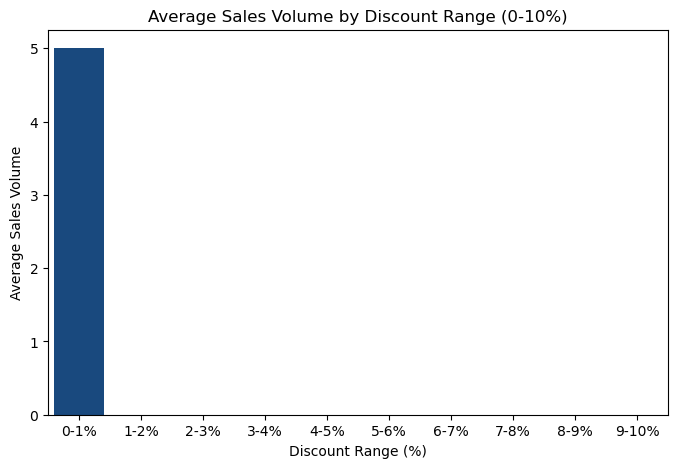

In [9]:
#3.2 Analyze Sales Volume by Discount Brackets

# Define discount bins (0-1%, 1-2%, ..., 9-10%)
bins = list(range(0, 11))  # Creates bins for 0-1%, 1-2%, ..., 9-10%
labels = [f"{i}-{i+1}%" for i in range(0, 10)]  # Labels for each bin

# Assign discount ranges to the dataset
df["discount_range"] = pd.cut(df["discount"], bins=bins, labels=labels, right=False)

# Compute average sales volume per discount range
discount_analysis = df.groupby("discount_range")["quantity"].mean()

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=discount_analysis.index, y=discount_analysis.values, palette="Blues_r")

# Titles and Labels
plt.title("Average Sales Volume by Discount Range (0-10%)")
plt.xlabel("Discount Range (%)")
plt.ylabel("Average Sales Volume")

plt.show()



Regarding 3.2 above - no meaningful analysis can be conducted as the discount ranges are limited to the 0-1%, which is too insignificant to draw any conclusions from. 

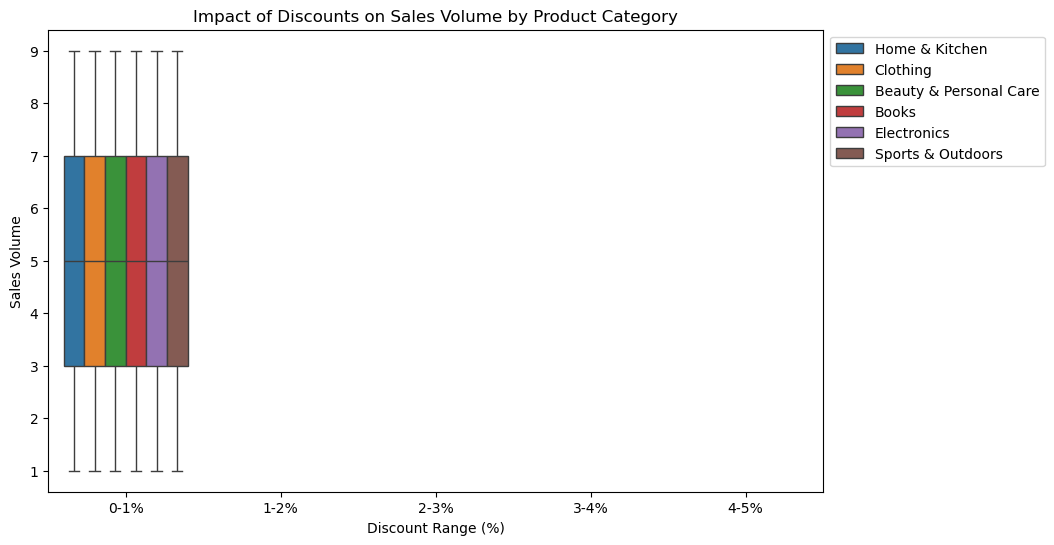

In [ ]:
#3.3 Compare Discount Effect Across Product Categories

plt.figure(figsize=(10, 6))
sns.boxplot(x="discount_range", y="quantity", hue="product_category", data=df)
plt.title("Impact of Discounts on Sales Volume by Product Category")
plt.xlabel("Discount Range (%)")
plt.ylabel("Sales Volume")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


Regarding 3.3 above - Because Sales Volume across categories are so similar and also given that there is only 1 discount range (0-1%) that has any data, nothing meaningful can be extracted. What we can say is that Discounts do not seem to have any material impact on sales volume across product categories.

C:\Users\jayba\AppData\Local\Temp\ipykernel_2144\4266529769.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=location_sales.index, y=location_sales.values, palette=colors)


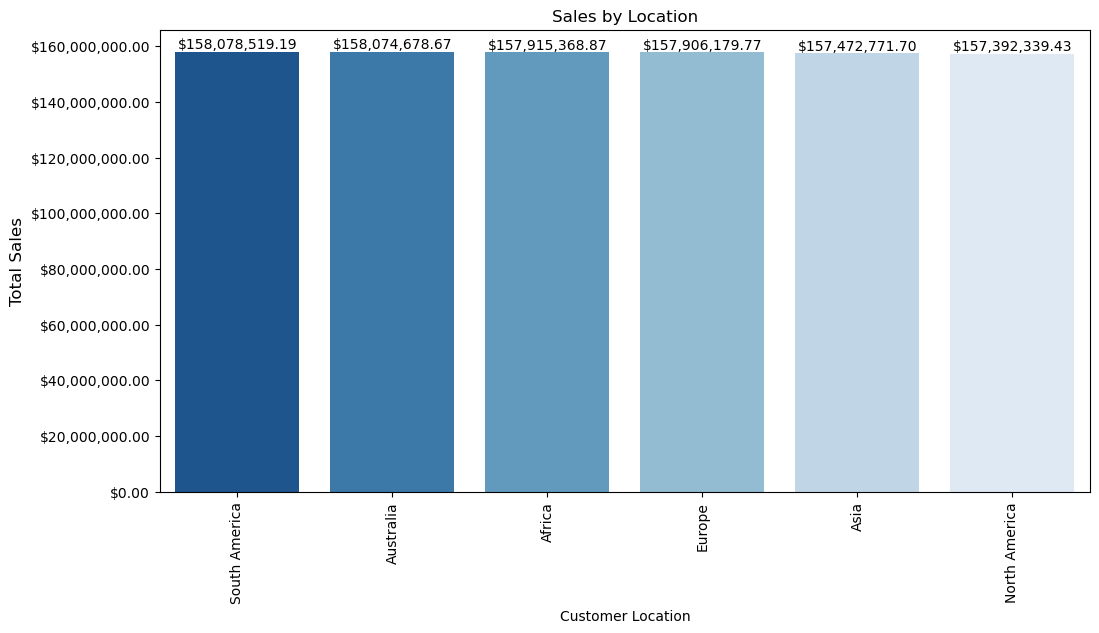

In [ ]:
#4. Sales by Location

location_sales = df.groupby('customer_location')['total_amount'].sum().sort_values(ascending=False)

colors = sns.color_palette("Blues_r", n_colors=len(location_sales))  # Using "Blues_r" for reverse order

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=location_sales.index, y=location_sales.values, palette=colors)

# Format y-axis as dollar values
ax.set_ylabel('Total Sales ($)', fontsize=12)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '${:,.2f}'.format(x)))

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate('${:,.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Sales by Location')
plt.xlabel('Customer Location')
plt.ylabel('Total Sales')
plt.show()



Key Insights 🔍 

📊 The bar chart generated from the given code shows total sales by customer location, helping to identify geographic trends in sales performance.

**Sales Distribution Across Locations**:

The bar chart illustrates total sales across different customer locations.

📈 South America leads in total sales, closely followed by Australia and Africa.

📉 North America has the lowest total sales, though the difference between locations is relatively small.


**Minimal Variation Among Locations**:

📊 The total sales figures across all regions are quite close to each other (around $157M–$158M).

⚖️ This suggests a balanced distribution of sales across different geographies, with no single location dominating significantly.

**💡 Potential Business Implications**:

🌍 Since no single region vastly outperforms the others, the company may have a well-diversified customer base across global markets.

🚀 If the goal is expansion, the company may consider targeting North America, as it has the lowest sales.

🎯 Market-specific strategies might be required to boost sales in underperforming regions.


C:\Users\jayba\AppData\Local\Temp\ipykernel_2144\4082131733.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('age_group')['total_amount'].sum()
C:\Users\jayba\AppData\Local\Temp\ipykernel_2144\4082131733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_sales.index, y=age_sales.values, palette=blues)


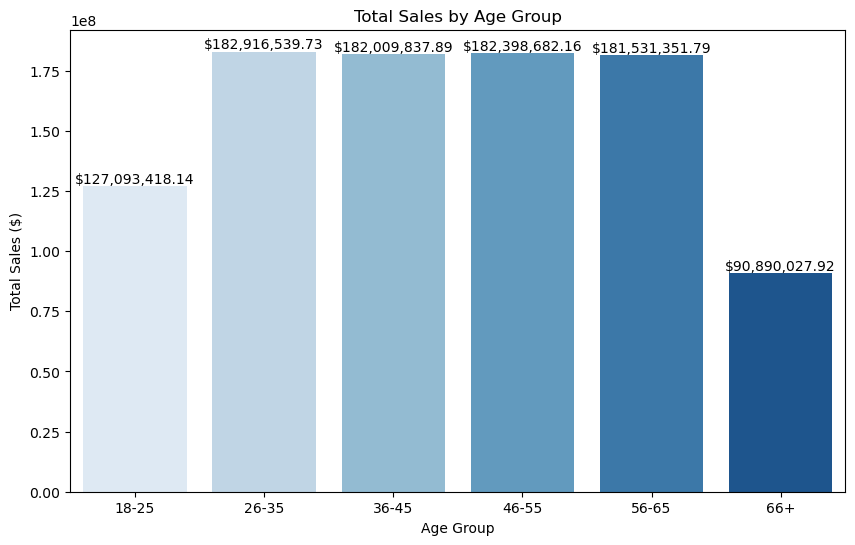

In [ ]:
#5. Sales by Age Group 

# Define age brackets
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Assign age bracket labels to the 'customer_age' column
df['age_group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Group by age bracket and sum the total sales
age_sales = df.groupby('age_group')['total_amount'].sum()

blues = sns.color_palette("Blues", len(age_sales))

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_sales.index, y=age_sales.values, palette=blues)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Title and labels
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales ($)')
plt.show()

Key Insights 🔍

**🎯 Sales Distribution Across Age Groups**:

📊 The 26-35, 36-45, and 46-55 age groups have the highest total sales, all around $182M.

📈 The 56-65 age group follows closely with around $181M in total sales.

⚠️ The 18-25 and 66+ age groups have significantly lower total sales, at $127M and $90M, respectively.

**🔍 Key Observations & Trends**:

📌 Peak Spending Age Groups: The 26-65 age range dominates sales, indicating that middle-aged customers are the primary revenue drivers.

📉 Lower Sales for Young & Senior Groups:

18-25 (Young Adults): Lower spending, possibly due to limited disposable income or different purchasing behaviors.
66+ (Seniors): A sharp decline in sales, potentially due to reduced need for certain products/services or lower engagement with the platform.


**💡 Business Implications**:

🎯 Targeted Marketing: Since 26-55 is the most profitable age range, this businesses could look at prioritizing marketing efforts toward these segments.

🚀 Youth Engagement Opportunity:
The 18-25 group shows a gap in sales, suggesting an opportunity to introduce:

    🎓 Student discounts
    💳 Loyalty programs
    🛍️ Youth-oriented products

🏆 Senior Market Potential:
The 66+ group has the lowest sales, but could be an untapped market. Strategies to increase engagement include:

    👵 Senior-friendly services
    🎟️ Exclusive discounts
    🏠 Customized promotions

